## Module 20: Initial Report and Exploratory Data Analysis (EDA)
---

In this module, you will work on performing exploratory data analysis (EDA) to develop an initial report for your capstone project. You will use EDA to see what data can reveal beyond the formal modeling, hypothesis testing task, and data training to provide a better understanding of dataset variables and the relationships between them. You are encouraged to spend your time in this module cleaning your data and use feature engineering and EDA techniques to create visualizations to make sense of your findings. Additionally, you will also be required to use one of the ML algorithms you have learned so far in the program to develop a baseline model to use as a comparison in Module 24. You will have time in Module 24 to include additional models, clean the code, and make your work presentable for technical and non-technical audiences. For now, you will do the ‘heavy lifting’ of finding the answer to your research question.

1. The research question you intend to answer (in one sentence, if possible)<br>
**How can machine learning be used to predict salaries and recommend optimal AI job roles for professionals in the global AI job market?**

2. Your expected data source(s) (as either a link to existing data or a sentence describing where you will source the data from): <br>
 **[Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)**

### Import Libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="deep")

### Load dataset

In [124]:
df = pd.read_csv("data/ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### Basic Cleaning

In [125]:
df = df.copy()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing salary fields
df = df[df["salary_usd"].notnull()]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

### Initial Inspection

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [127]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [128]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [129]:
df.duplicated().sum()

0

In [130]:
print(df['company_location'].value_counts())

company_location
Germany           814
Denmark           778
France            769
Canada            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Finland           733
Japan             733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64


In [131]:
print(df['job_title'].value_counts())

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64


## Exploratory Data Analysis

### Salary Distribution

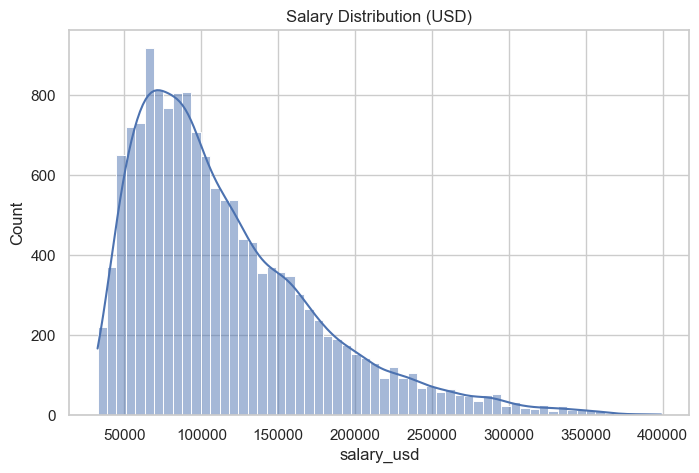

In [132]:
plt.figure(figsize=(8,5))
sns.histplot(df["salary_usd"], kde=True)
plt.title("Salary Distribution (USD)")
plt.show()

### Salary by Experience Level

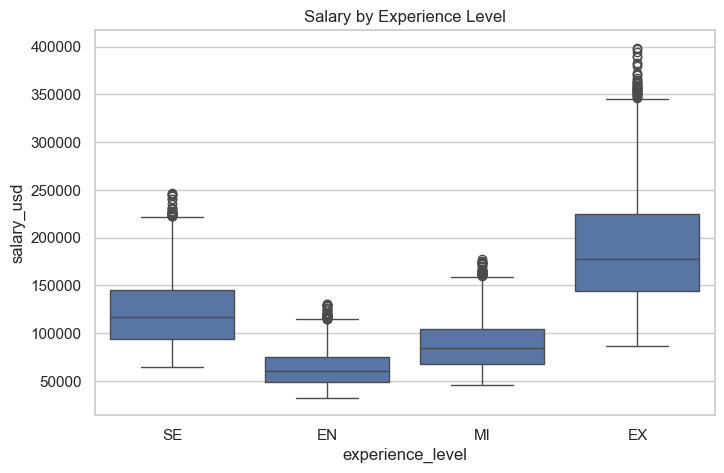

In [133]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="experience_level", y="salary_usd")
plt.title("Salary by Experience Level")
plt.show()


### Salary by Job Title (Top 20)

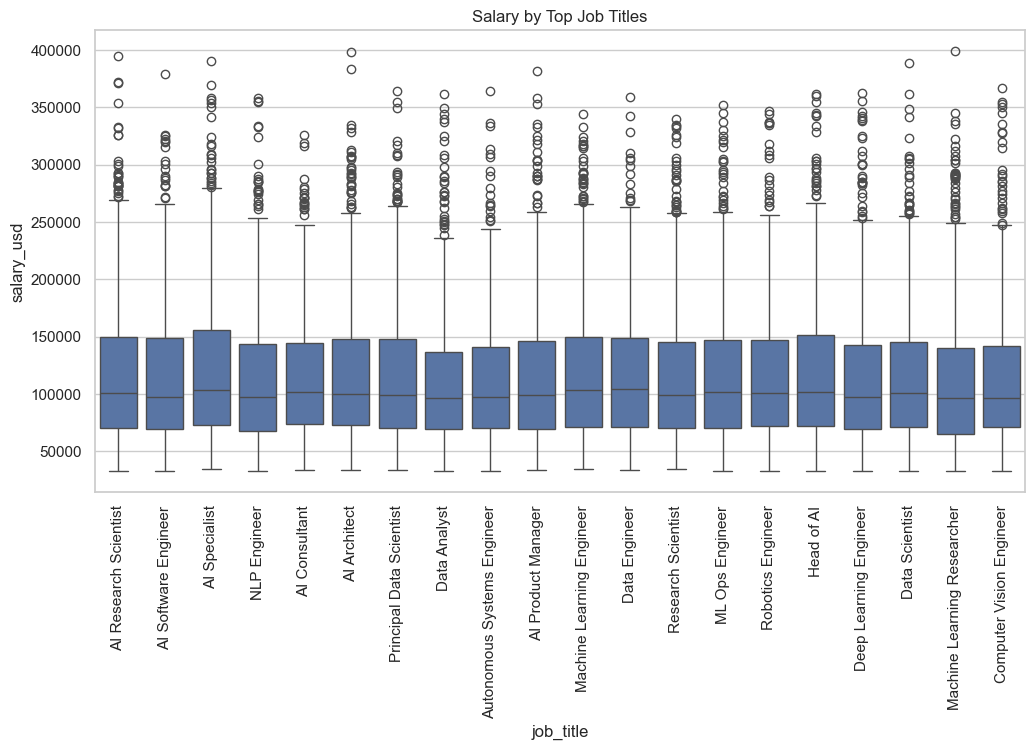

In [134]:
top_titles = df["job_title"].value_counts().nlargest(20).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["job_title"].isin(top_titles)], 
            x="job_title", y="salary_usd")
plt.xticks(rotation=90)
plt.title("Salary by Top Job Titles")
plt.show()

### Correlation Heatmap (Numeric Features)

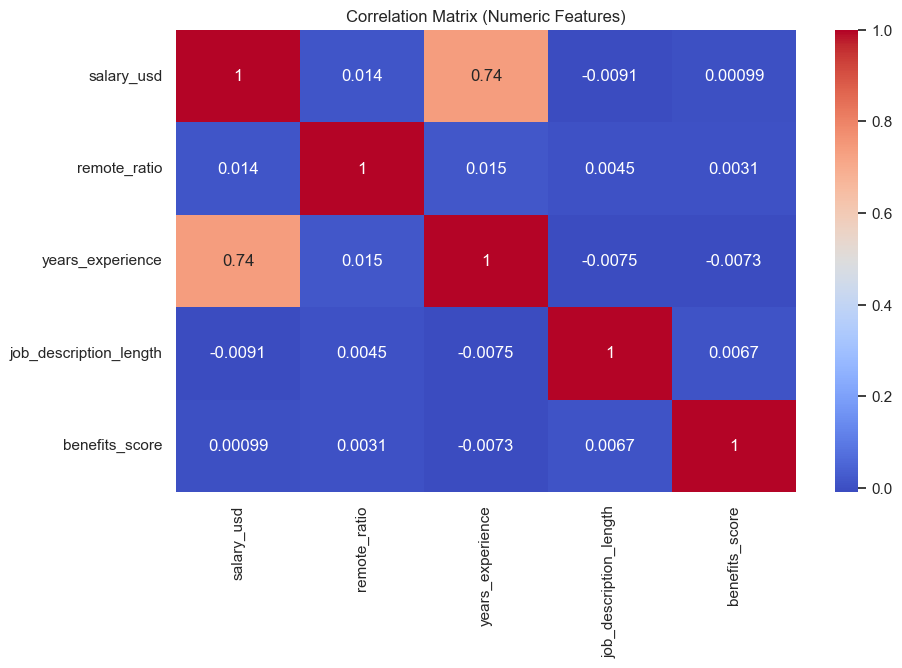

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

## Feature Engineering

In [136]:
def feature_engineering(df):
    df = df.copy()

    # Log-transform salary
    df["log_salary"] = np.log1p(df["salary_usd"])

    # Skill count
    df["skill_count"] = df["required_skills"].astype(str).apply(
        lambda x: len(x.split(",")) if x != "nan" else 0
    )

    # Seniority extraction
    df["seniority"] = (
        df["experience_level"]
        .astype(str)
        .str.lower()
        .apply(lambda x:
               "Executive" if "ex" in x or "exec" in x else
               "Senior" if "se" in x or "sr" in x else
               "Entry" if "en" in x else
               "Mid")
    )

    # Posting date features
    df["posting_date"] = pd.to_datetime(df["posting_date"], errors="coerce")
    df["posting_month"] = df["posting_date"].dt.month
    df["posting_year"] = df["posting_date"].dt.year

    # Days to application deadline
    df["application_deadline"] = pd.to_datetime(df["application_deadline"], errors="coerce")
    df["days_to_deadline"] = (df["application_deadline"] - df["posting_date"]).dt.days

    # Normalized job description length
    df["desc_length_norm"] = (
        df["job_description_length"] / df["job_description_length"].max()
    )

    return df

### Apply Feature Engineering

In [137]:
df_fe = feature_engineering(df)
df_fe.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,log_salary,skill_count,seniority,posting_month,posting_year,days_to_deadline,desc_length_norm
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,11.411745,5,Senior,10,2024,20,0.430572
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,11.033211,5,Entry,11,2024,52,0.507403
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,11.935752,5,Mid,3,2025,20,0.789916
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,11.292478,4,Senior,12,2024,63,0.538215
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,10.908247,4,Entry,4,2025,69,0.795918


### Select Features and Target

In [138]:
X = df_fe.drop(['salary_usd', 'job_id', 'log_salary'], axis=1)
y = df_fe["salary_usd"]

### Train-Test Split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (12000, 23)
X_test shape: (3000, 23)


### Identify Feature Types

In [140]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

### Preprocessing and Model Pipeline

In [141]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=150,
        random_state=42,
        n_jobs = -1
        
    ))
])

pipeline

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Cross-Validation

In [142]:
cv_results = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=3,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    n_jobs=-1
)

In [143]:
cv_summary = {
    "R2_mean": cv_results["test_r2"].mean(),
    "MAE_mean": -cv_results["test_neg_mean_absolute_error"].mean(),
    "RMSE_mean": -cv_results["test_neg_root_mean_squared_error"].mean(),
}

cv_summary

{'R2_mean': 0.8759773945903554,
 'MAE_mean': 14963.370507222222,
 'RMSE_mean': 21191.288409146415}

### Fit the pipeline

In [144]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Predict

In [145]:
preds = pipeline.predict(X_test)
print("Pipeline successfully trained.")

Pipeline successfully trained.


### Evaluate the model

In [146]:
# Predict on test set
y_pred = pipeline.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 15129.40
RMSE: 21143.34
R² Score: 0.877


### Predicted vs Actual Plot

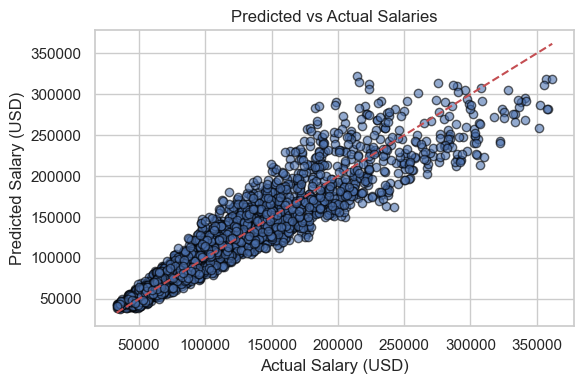

In [147]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted vs Actual Salaries")
plt.grid(True)
plt.tight_layout()
plt.show()

### Residual Plot

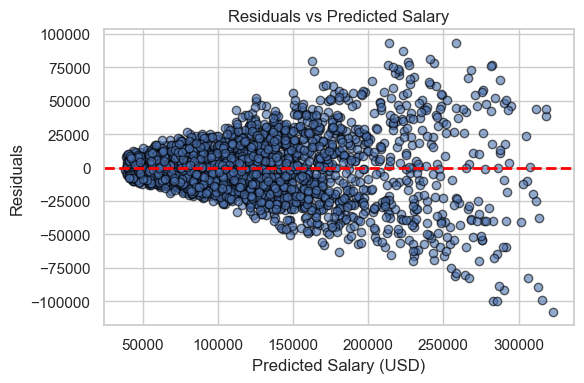

In [148]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Salary (USD)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

### Feature Importance

In [149]:
rf_model = pipeline.named_steps["model"]
num_features_list = numeric_features

cat_encoder = pipeline.named_steps["preprocess"] \
                      .named_transformers_["cat"]

cat_features_list = cat_encoder.get_feature_names_out(
    categorical_features
).tolist()

all_features = num_features_list + cat_features_list

importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

importance_df.head(10)

,feature,importance
1,years_experience,0.201873
31,experience_level_EX,0.185275
11221,seniority_Executive,0.134057
55,company_location_Switzerland,0.056897
42,company_location_Denmark,0.041020
58,company_size_L,0.038541
33,experience_level_SE,0.036527
51,company_location_Norway,0.036067
11223,seniority_Senior,0.032427
57,company_location_United States,0.027093
